# Getting data from a Socrata API

Many governments use <a href="https://www.tylertech.com/products/socrata" target="_blank">socrata</a> as their platform to serve data to the public. The <a href="https://dev.socrata.com/docs/endpoints.html" target="_blank">Socrata API</a> allows direct and real-time access to open data.

For this tutorial, we will look at LAPD's arrest data:

https://data.lacity.org/A-Safe-City/Arrest-Data-from-2020-to-Present/amvf-fr72

To access the data, we will use the `sodapy` library:

https://github.com/xmunoz/sodapy



In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# !pip install sodapy

Instructions on how to use `sodapy` to access data for this dataset:

https://dev.socrata.com/foundry/data.lacity.org/amvf-fr72

In [1]:
import pandas as pd
import plotly.express as px
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

In [2]:
# get the latest 5000 records
results = client.get("amvf-fr72", 
                     limit = 2000,
                     order = "arst_date desc")

# Convert to pandas DataFrame
df = pd.DataFrame.from_records(results)

In [3]:
df.head()

rpt_id report_type                arst_date  time area  area_desc    rd  \
0    5982808     BOOKING  2020-08-01T00:00:00.000  0330   18  Southeast  1864   
1    5982775     BOOKING  2020-08-01T00:00:00.000  0058   19    Mission  1911   
2    5982913     BOOKING  2020-08-01T00:00:00.000  1015   13     Newton  1373   
3  201414703         RFC  2020-08-01T00:00:00.000  0755   14    Pacific  1494   
4    5982937     BOOKING  2020-08-01T00:00:00.000  1100   14    Pacific  1494   

  age sex_cd descent_cd  ...                   dispo_desc  \
0  26      F          H  ...  MISDEMEANOR COMPLAINT FILED   
1  32      M          O  ...                          NaN   
2  41      M          B  ...  MISDEMEANOR COMPLAINT FILED   
3  18      M          H  ...  MISDEMEANOR COMPLAINT FILED   
4  26      M          B  ...                          NaN   

                                 location      lat        lon  \
0  800 E  120TH                        ST  33.9237   -118.261   
1         SAN FERNANDO                 BL  34.3149  -118.4893   
2  600 E  54TH                         ST  33.9933  -118.2652   
3                        200    WORLD WAY  33.9452  -118.4033   
4                         500    WORLDWAY   33.942  -118.4095   

                                          location_1                 bkg_date  \
0  {'type': 'Point', 'coordinates': [-118.261, 33...  2020-08-01T00:00:00.000   
1  {'type': 'Point', 'coordinates': [-118.4893, 3...  2020-08-01T00:00:00.000   
2  {'type': 'Point', 'coordinates': [-118.2652, 3...  2020-08-01T00:00:00.000   
3  {'type': 'Point', 'coordinates': [-118.4033, 3...                      NaN   
4  {'type': 'Point', 'coordinates': [-118.4095, 3...  2020-08-01T00:00:00.000   

  bkg_time           bgk_location bkg_loc_cd                            crsst  
0     0456                77TH ST       4212                              NaN  
1     0328      VALLEY - JAIL DIV       4279  GOLDEN STATE                 FY  
2     1204  METRO - JAIL DIVISION       4273                              NaN  
3      NaN                    NaN        NaN                              NaN  
4     1341                PACIFIC       4214                              NaN  

[5 rows x 25 columns]

# Exploration

In [4]:
# what fields?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           2000 non-null   object
 1   report_type      2000 non-null   object
 2   arst_date        2000 non-null   object
 3   time             2000 non-null   object
 4   area             2000 non-null   object
 5   area_desc        2000 non-null   object
 6   rd               2000 non-null   object
 7   age              2000 non-null   object
 8   sex_cd           2000 non-null   object
 9   descent_cd       2000 non-null   object
 10  chrg_grp_cd      1850 non-null   object
 11  grp_description  1850 non-null   object
 12  arst_typ_cd      2000 non-null   object
 13  charge           2000 non-null   object
 14  chrg_desc        1850 non-null   object
 15  dispo_desc       1555 non-null   object
 16  location         2000 non-null   object
 17  lat              2000 non-null   

In [8]:
# show me distinct value of charges
df.grp_description.unique()

array(['Other Assaults', 'Driving Under Influence',
       'Against Family/Child', nan, 'Narcotic Drug Laws',
       'Miscellaneous Other Violations', 'Homicide',
       'Moving Traffic Violations', 'Liquor Laws', 'Vehicle Theft',
       'Sex (except rape/prst)', 'Weapon (carry/poss)', 'Robbery',
       'Prostitution/Allied', 'Burglary', 'Fraud/Embezzlement',
       'Receive Stolen Property', 'Aggravated Assault', 'Larceny',
       'Disorderly Conduct', 'Forgery/Counterfeit', 'Drunkeness',
       'Gambling', 'Federal Offenses', 'Rape', 'Non-Criminal Detention',
       'Pre-Delinquency', 'Disturbing the Peace'], dtype=object)

In [9]:
# show me distinct value of dates
df.arst_date.unique()

array(['2020-08-01T00:00:00.000', '2020-07-31T00:00:00.000',
       '2020-07-30T00:00:00.000', '2020-07-29T00:00:00.000',
       '2020-07-28T00:00:00.000', '2020-07-27T00:00:00.000',
       '2020-07-26T00:00:00.000', '2020-07-25T00:00:00.000',
       '2020-07-24T00:00:00.000', '2020-07-23T00:00:00.000',
       '2020-07-22T00:00:00.000', '2020-07-21T00:00:00.000',
       '2020-07-20T00:00:00.000', '2020-07-19T00:00:00.000',
       '2020-07-18T00:00:00.000'], dtype=object)

In [10]:
# ok, group by date and charge, and let's get a count for each
df_date=df.groupby(['arst_date','grp_description']).count()[['rpt_id']]
df_date.head(50)

rpt_id
arst_date               grp_description                       
2020-07-18T00:00:00.000 Against Family/Child                 2
                        Aggravated Assault                  16
                        Driving Under Influence             28
                        Drunkeness                           1
                        Larceny                              1
                        Liquor Laws                          1
                        Miscellaneous Other Violations      12
                        Moving Traffic Violations            3
                        Narcotic Drug Laws                  10
                        Other Assaults                      11
                        Prostitution/Allied                  6
                        Robbery                              2
                        Vehicle Theft                        5
                        Weapon (carry/poss)                  7
2020-07-19T00:00:00.000 Against Family/Child                 1
                        Aggravated Assault                  23
                        Burglary                             7
                        Disturbing the Peace                 1
                        Driving Under Influence             28
                        Fraud/Embezzlement                   1
                        Homicide                             1
                        Larceny                              4
                        Liquor Laws                          9
                        Miscellaneous Other Violations      21
                        Moving Traffic Violations            3
                        Narcotic Drug Laws                   5
                        Other Assaults                      28
                        Receive Stolen Property              1
                        Robbery                              4
                        Vehicle Theft                        9
                        Weapon (carry/poss)                  6
2020-07-20T00:00:00.000 Against Family/Child                 4
                        Aggravated Assault                  20
                        Burglary                             9
                        Driving Under Influence              7
                        Drunkeness                           2
                        Fraud/Embezzlement                   3
                        Gambling                             4
                        Larceny                              9
                        Liquor Laws                          4
                        Miscellaneous Other Violations      19
                        Moving Traffic Violations            2
                        Narcotic Drug Laws                   8
                        Other Assaults                      20
                        Receive Stolen Property              1
                        Robbery                              6
                        Sex (except rape/prst)               2
                        Vehicle Theft                        3
                        Weapon (carry/poss)                  8
2020-07-21T00:00:00.000 Against Family/Child                 1

In [11]:
# flatten the multi-indexed dataframe
df_flat = pd.DataFrame(df_date.to_records())
df_flat

arst_date                 grp_description  rpt_id
0    2020-07-18T00:00:00.000            Against Family/Child       2
1    2020-07-18T00:00:00.000              Aggravated Assault      16
2    2020-07-18T00:00:00.000         Driving Under Influence      28
3    2020-07-18T00:00:00.000                      Drunkeness       1
4    2020-07-18T00:00:00.000                         Larceny       1
..                       ...                             ...     ...
246  2020-08-01T00:00:00.000                        Homicide       1
247  2020-08-01T00:00:00.000  Miscellaneous Other Violations       3
248  2020-08-01T00:00:00.000       Moving Traffic Violations       1
249  2020-08-01T00:00:00.000              Narcotic Drug Laws       1
250  2020-08-01T00:00:00.000                  Other Assaults       2

[251 rows x 3 columns]

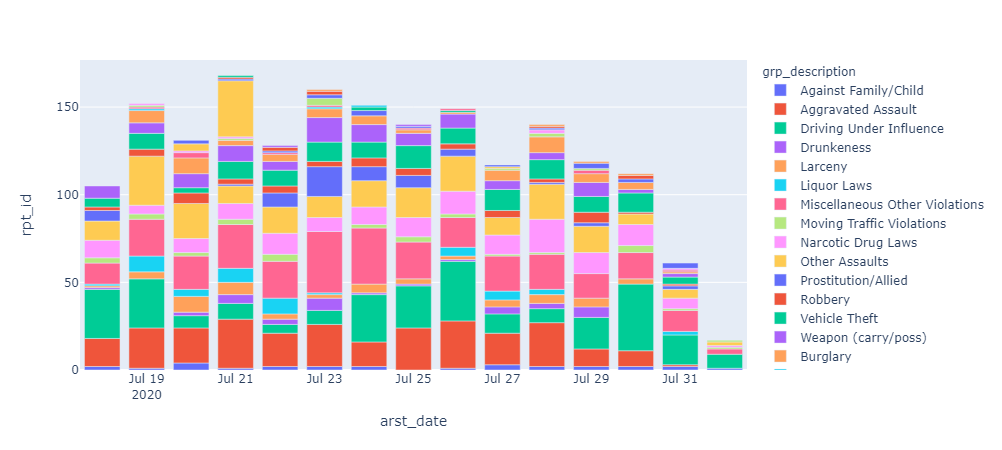

In [12]:
# make a bar chart
px.bar(df_flat,
       x='arst_date',
       y='rpt_id',
       color='grp_description'
      )

# Mapping

Let's go back to the original dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   rpt_id           2000 non-null   object
 1   report_type      2000 non-null   object
 2   arst_date        2000 non-null   object
 3   time             2000 non-null   object
 4   area             2000 non-null   object
 5   area_desc        2000 non-null   object
 6   rd               2000 non-null   object
 7   age              2000 non-null   object
 8   sex_cd           2000 non-null   object
 9   descent_cd       2000 non-null   object
 10  chrg_grp_cd      1850 non-null   object
 11  grp_description  1850 non-null   object
 12  arst_typ_cd      2000 non-null   object
 13  charge           2000 non-null   object
 14  chrg_desc        1850 non-null   object
 15  dispo_desc       1555 non-null   object
 16  location         2000 non-null   object
 17  lat              2000 non-null   

That's a lot of fields. Let's create a subset of the data with just the following fields:

- `arts_date`
- `age`
- `descent_cd`
- `grp_description`
- `lat`
- `lon`


In [14]:
# subset the data
df_mini = df[['arst_date','age','descent_cd','grp_description','lat','lon']]
df_mini

arst_date age descent_cd          grp_description  \
0     2020-08-01T00:00:00.000  26          H           Other Assaults   
1     2020-08-01T00:00:00.000  32          O  Driving Under Influence   
2     2020-08-01T00:00:00.000  41          B     Against Family/Child   
3     2020-08-01T00:00:00.000  18          H                      NaN   
4     2020-08-01T00:00:00.000  26          B       Narcotic Drug Laws   
...                       ...  ..        ...                      ...   
1995  2020-07-18T00:00:00.000  20          H      Weapon (carry/poss)   
1996  2020-07-18T00:00:00.000  51          H       Aggravated Assault   
1997  2020-07-18T00:00:00.000  47          H       Narcotic Drug Laws   
1998  2020-07-18T00:00:00.000  29          B       Aggravated Assault   
1999  2020-07-18T00:00:00.000  27          H       Aggravated Assault   

          lat        lon  
0     33.9237   -118.261  
1     34.3149  -118.4893  
2     33.9933  -118.2652  
3     33.9452  -118.4033  
4      33.942  -118.4095  
...       ...        ...  
1995  34.2268  -118.3631  
1996  34.1938  -118.4702  
1997  34.0287  -118.3931  
1998  33.9655  -118.2871  
1999  34.0506  -118.2769  

[2000 rows x 6 columns]

In [15]:
# any null values?
df_mini.isnull().sum()

arst_date            0
age                  0
descent_cd           0
grp_description    150
lat                  0
lon                  0
dtype: int64

Our `lat` and `lon` columns need to be of data type float. Let's convert them.

In [16]:
# convert lat/lon's to floats
df_mini['lat'] = df_mini['lat'].astype(float)
df_mini['lon'] = df_mini['lon'].astype(float)
df_mini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   arst_date        2000 non-null   object 
 1   age              2000 non-null   object 
 2   descent_cd       2000 non-null   object 
 3   grp_description  1850 non-null   object 
 4   lat              2000 non-null   float64
 5   lon              2000 non-null   float64
dtypes: float64(2), object(4)
memory usage: 93.9+ KB


C:\Users\Yoh Kawano\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yoh Kawano\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



What happens if we create a scatter plot, placing `lon` in the x-axis `lat` in the y-axis?

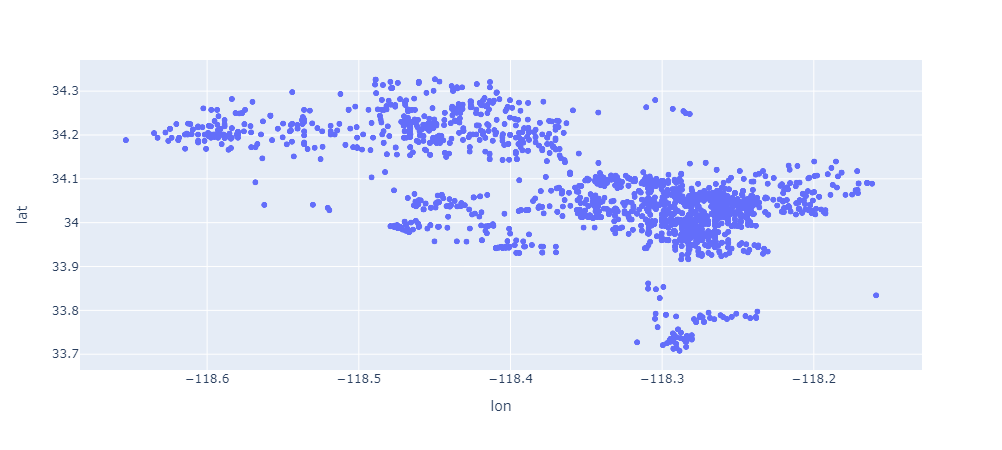

In [17]:
px.scatter(df_mini,
           x='lon',
           y='lat'
          )

In [18]:
px.scatter_mapbox?

Signature:
px.scatter_mapbox(
    data_frame=None,
    lat=None,
    lon=None,
    color=None,
    text=None,
    hover_name=None,
    hover_data=None,
    custom_data=None,
    size=None,
    animation_frame=None,
    animation_group=None,
    category_orders={},
    labels={},
    color_discrete_sequence=None,
    color_discrete_map={},
    color_continuous_scale=None,
    range_color=None,
    color_continuous_midpoint=None,
    opacity=None,
    size_max=None,
    zoom=8,
    center=None,
    mapbox_style=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a Mapbox scatter plot, each row of `data_frame` is represented by a
    symbol mark on a Mapbox map.
    
Parameters
----------
data_frame: DataFrame or array-like or dict
    This argument needs to be passed for column names (and not keyword
    names) to be used. Array-like and dict are tranformed internally to a
    pandas DataFrame. Optional: if missing, a DataFrame gets constructed
 

## Interactive map
Plotly has support for a mapbox slippy map. Have fun with this, and change the `mapbox_style` attribute to any of the following:

* `open-street-map`
* `white-bg`
* `carto-positron`
* `carto-darkmatter`
* `stamen-terrain`
* `stamen-toner`
* `stamen-watercolor`


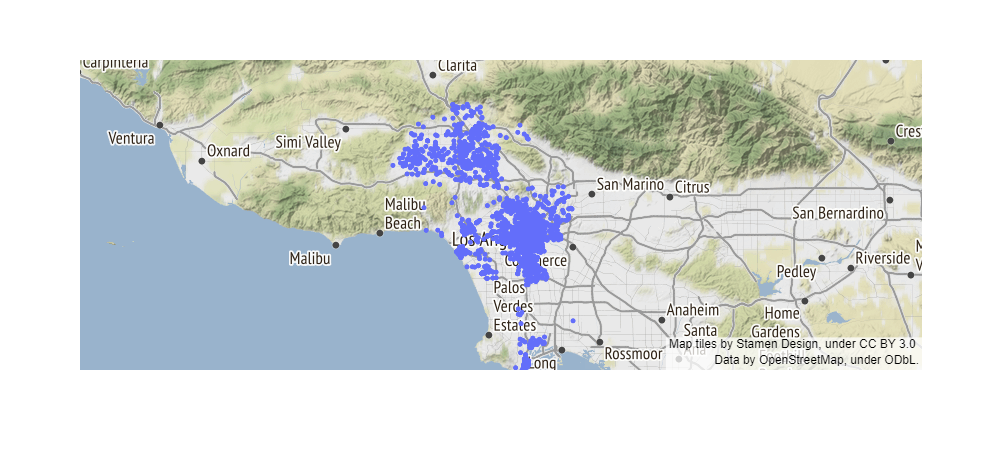

In [19]:
fig = px.scatter_mapbox(df_mini,
                        lat='lat',
                        lon='lon',
                        mapbox_style="stamen-terrain")
# fig.update_geos(fitbounds="locations", scope = "usa")
fig.show()

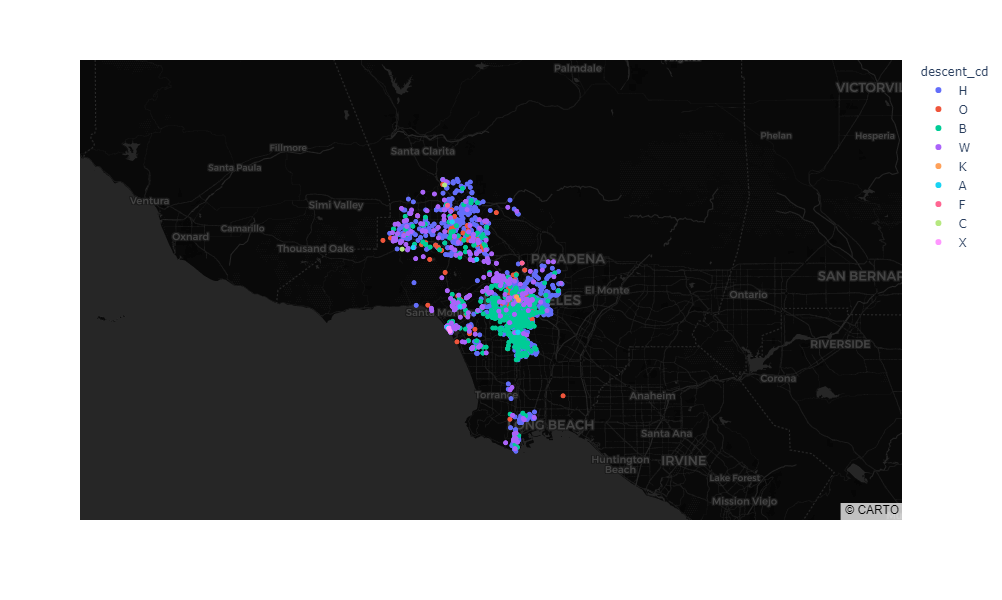

In [20]:
fig = px.scatter_mapbox(df_mini, 
                        lat="lat", 
                        lon="lon", 
                        hover_name="descent_cd", 
                        hover_data=["descent_cd"], 
                        color="descent_cd",
#                         color_discrete_sequence=["fuchsia"], 
                        zoom=8, height=600,
#                        animation_frame="arst_date",
#                        animation_group="descent_cd"
                       )
fig.update_layout(mapbox_style="carto-darkmatter")
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Kepler

In [22]:
import gdal

    
import geopandas
from keplergl import KeplerGl

In [23]:
map = KeplerGl(height=600,width=800)
map

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(height=600)